In [1]:
!pip install tensorflow

# ライブラリのインポート

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization
import copy
from IPython import display
from sklearn.model_selection import train_test_split

# y_trainとy_testの無駄な次元を削除

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

170498071/170498071 [==============================] - 4s 0us/step


# 犬と猫だけを抽出

In [4]:
cat_idx = 3
dog_idx = 5

x_cat_train = x_train[np.where(y_train==cat_idx)]
x_cat_test = x_test[np.where(y_test==cat_idx)]

x_dog_train = x_train[np.where(y_train==dog_idx)]
x_dog_test = x_test[np.where(y_test==dog_idx)]

# 犬の画像を確認

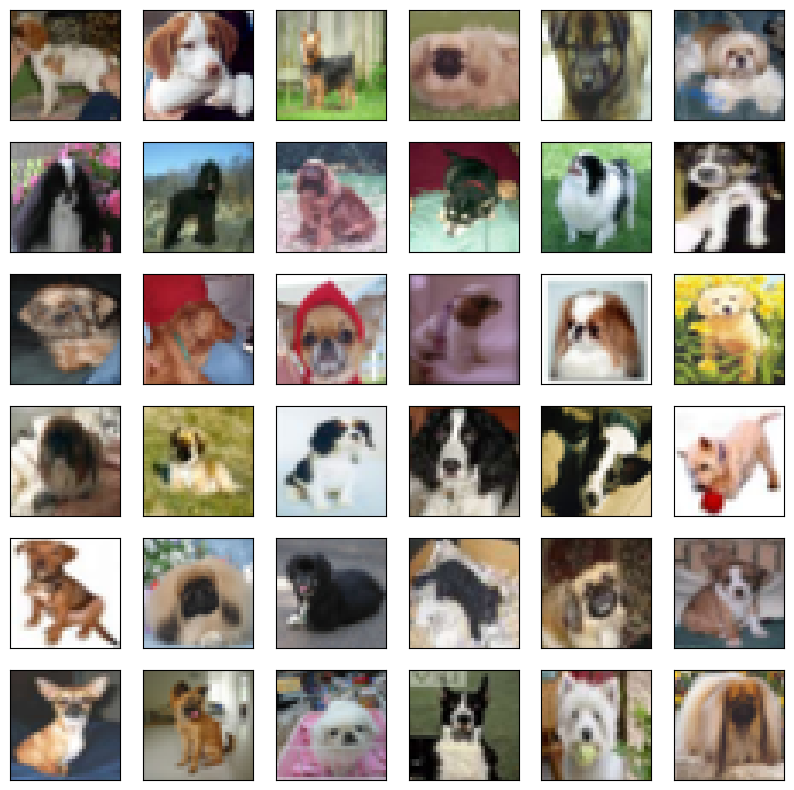

In [5]:
def plot_imgs(input_imgs):
    plt.figure(figsize=(10,10))
    plt_idx = 1
    for i in range(36):
        plt.subplot(6,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.squeeze(input_imgs[i]), cmap="gray", vmin=0, vmax=1)
    plt.show()

plot_imgs(x_dog_test)

# 猫の画像の確認

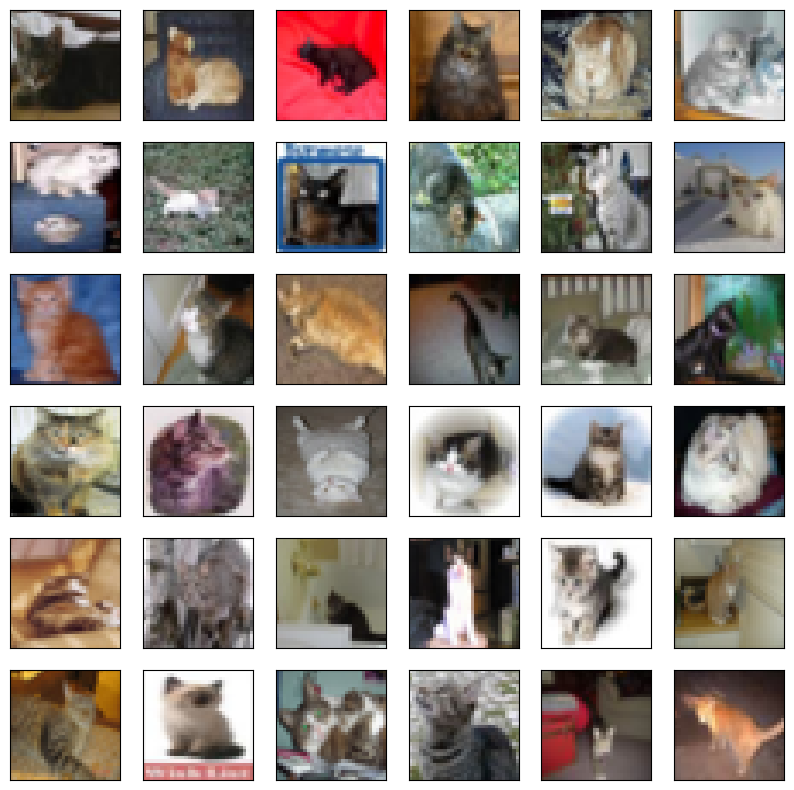

In [6]:
plot_imgs(x_cat_train)

# 犬と猫の画像を１つにして、入力データを作成（犬を1、猫を0）

In [7]:
x_train = np.concatenate((x_cat_train, x_dog_train))
x_test = np.concatenate((x_cat_test, x_dog_test))

y_train = np.concatenate((np.zeros(x_cat_train.shape[0]),np.ones(x_dog_train.shape[0])))
y_test = np.concatenate((np.zeros(x_cat_test.shape[0]),np.ones(x_dog_test.shape[0])))

# 学習データとテストデータを分ける

In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

# モデル作成（畳み込みニューラルネットワーク）

In [9]:
model = Sequential([
    Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'), MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'), MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 最適化関数と誤差関数を定義

In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# モデルの学習

In [14]:
history = model.fit(x_train, y_train, epochs=50,
                    batch_size=32,validation_data=(x_valid, y_valid))

Epoch 1/50
210/210 [==============================] - 13s 8ms/step - loss: 2.5335 - accuracy: 0.5639 - val_loss: 0.6710 - val_accuracy: 0.5724
Epoch 2/50
210/210 [==============================] - 1s 5ms/step - loss: 0.6521 - accuracy: 0.6128 - val_loss: 0.6556 - val_accuracy: 0.6239
Epoch 3/50
210/210 [==============================] - 1s 6ms/step - loss: 0.6377 - accuracy: 0.6228 - val_loss: 0.6613 - val_accuracy: 0.6015
Epoch 4/50
210/210 [==============================] - 1s 5ms/step - loss: 0.6196 - accuracy: 0.6349 - val_loss: 0.6706 - val_accuracy: 0.6227
Epoch 5/50
210/210 [==============================] - 2s 8ms/step - loss: 0.6081 - accuracy: 0.6525 - val_loss: 0.6770 - val_accuracy: 0.6039
Epoch 6/50
210/210 [==============================] - 1s 7ms/step - loss: 0.5955 - accuracy: 0.6619 - val_loss: 0.6653 - val_accuracy: 0.6133
Epoch 7/50
210/210 [==============================] - 1s 6ms/step - loss: 0.5757 - accuracy: 0.6766 - val_loss: 0.6506 - val_accuracy: 0.6212
Epoch

# 学習時の誤差の推移と正答率の推移をプロット

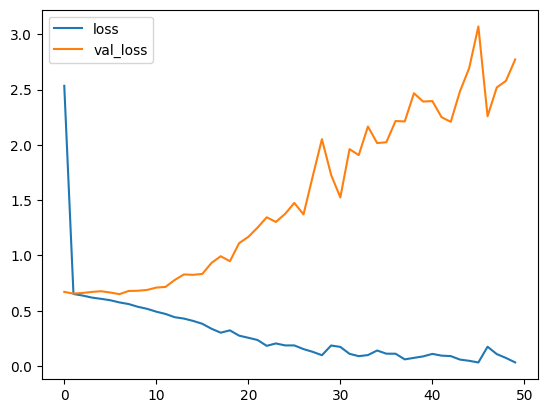

In [15]:
history = history.history
plt.plot(np.arange(len(history['loss'])),history['loss'], label='loss')
plt.plot(np.arange(len(history['val_loss'])),history['val_loss'],label='val_loss')
plt.legend()

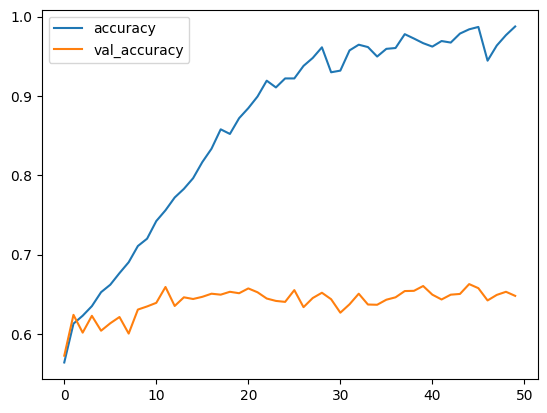

In [16]:
plt.plot(np.arange(len(history['accuracy'])),
         history['accuracy'], label='accuracy')
plt.plot(np.arange(len(history['val_accuracy'])),
         history['val_accuracy'], label='val_accuracy')
plt.legend()

# 学習に使ったデータに対しての出力を確認

(6700,)


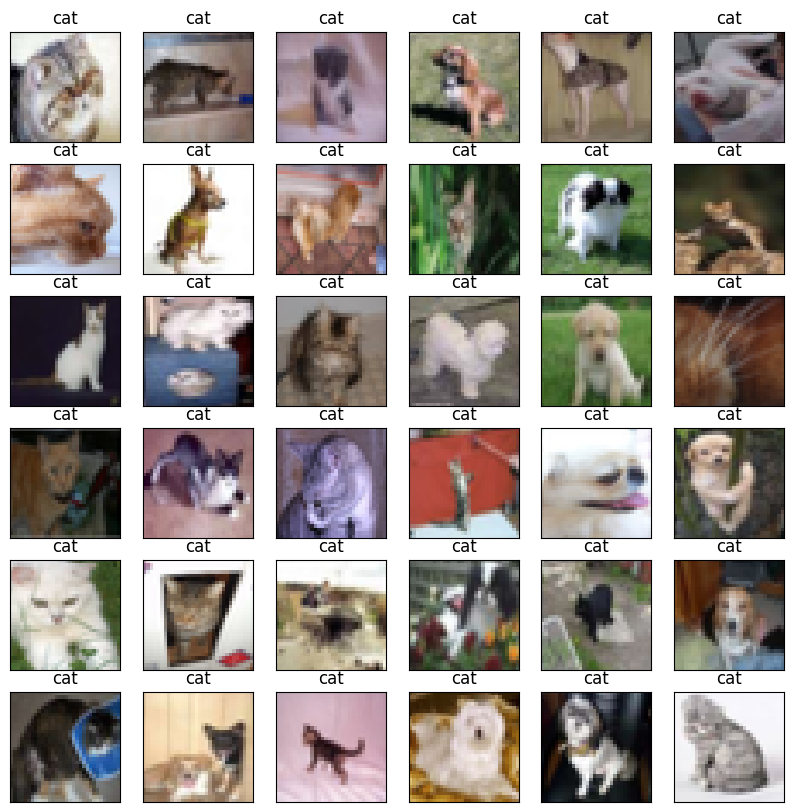

In [20]:
def plot_imgs_labels(model, input_imgs):
    plt.figure(figsize=(10,10))
    plt_idx = 1
    outputs = model(input_imgs, training=True)
    outputs = tf.squeeze(outputs).numpy()
    labels = np.round(outputs)

    plt_indexs = np.random.randint(0,len(labels),size=36)
    print(labels.shape)
    for i in range(36):
        plt.subplot(6,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt_i = plt_indexs[i]
        if plt_i == 1:
            label = 'dog'
        else:
            label = 'cat'
        plt.title('{}'.format(label))
        plt.imshow(np.squeeze(input_imgs[plt_i]),cmap='gray',vmin=0,vmax=1)
    plt.show()
plot_imgs_labels(model, x_train)

# テストデータに対する出力の確認

(2000,)


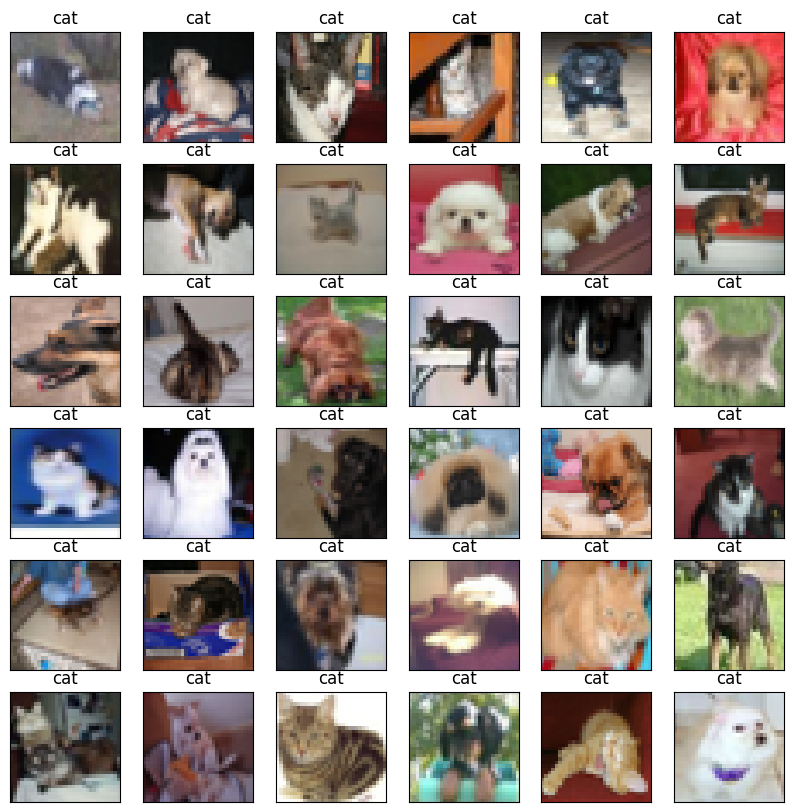

In [21]:
plot_imgs_labels(model, x_test)